In [1]:
import numpy as np
import random
import collections 
import matplotlib.pyplot as plt

In [2]:
#awards rewards based on winnings 
def check_win(configuration):
    wins = [[0,1,2,3],[4,5,6,7],[8,9,10,11],
            [12,13,14,15],[0,4,8,12],[1,5,9,13],
            [2,6,10,14],[3,7,11,15],[0,5,10,15],[3,6,9,12]]
    
    for i in range(10):
        if (configuration[wins[i][0]] == 1 and
            configuration[wins[i][1]] == 1 and
            configuration[wins[i][2]] == 1 and 
            configuration[wins[i][3]] == 1):
            return 1
    
    for i in range(10):
        if (configuration[wins[i][0]] == 2 and
            configuration[wins[i][1]] == 2 and
            configuration[wins[i][2]] == 2 and 
            configuration[wins[i][3]] == 2):
            return -1
    return 0  

In [3]:
#converts the board into an integer to store the values
def state_to_key(state):
    key = 0
    for i, elem in enumerate(state):
        key += int(elem * 3**(i))
    return key

In [4]:
#returns the next and reward given a state and action
def make_move(state,action,player):
    state[action]=player
    reward=check_win(state)
    return state,reward

In [5]:
#choosing an action based on e-greedy policy
def select_action(state,act_choices):
    global td_Q
    global td_Ct, used_q, not_used_q, used_eps
    epsilon = 0.1 
    n = random.uniform(0,1)
    if(n<epsilon):
        return random.choice(act_choices)
    else:
        act_chosen=-1
        q_val=-1000.0
        for act in act_choices:
            if (td_Q[state][act]!=0 and td_Q[state][act]>q_val):
                q_val=td_Q[state][act]
                act_chosen=act
        if (act_chosen<0):
            act_chosen = random.choice(act_choices)
    return act_chosen

In [6]:
#trains an agent using 1 million episodes
def off_policy_td_control():
    global win_list,loss_list,tie_list,x_axis
    wins = 0 
    loss = 0 
    tie = 0 
    global td_Q
    #global td_Ct
    reward_list = []
    for i in range(1000001):  
        state = np.zeros(16)
        action_choices = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
        player=random.choice([0,1])
        reward=0
        reward_list.append(reward)
        while(reward==0 and len(action_choices)>0):
            state_key=state_to_key(state)
            action = select_action(state_key,action_choices)
            action_choices.remove(action)   
            player=player%2+1
            new_state,reward=make_move(state,action,player)
            new_state_key=state_to_key(new_state)
            alpha=0.5
            td_Q[state_key][action] += alpha * (reward + np.max(td_Q[new_state_key]) - td_Q[state_key][action])
            state=new_state
            
        if (reward==1):
            wins+=1
        elif (reward==-1):
            loss+=1
        else:
            tie+=1
            
        if (i>0 and (i%100000==0 or i==50000 or i==20000 or i==10000 or i==5000)):
            print("After ",i," episodes: ")
            total=wins+loss+tie
            win_pct=round(100*wins/total,2)
            loss_pct=round(100*loss/total,2)
            tie_pct=round(100*tie/total,2)
            if total>0:
                x_axis.append(i)
                win_list.append(win_pct)
                loss_list.append(loss_pct)
                tie_list.append(tie_pct)
            print("   wins: ",win_pct,"; loss: ", loss_pct,"; tie: ",tie_pct)
            wins = 0 
            loss = 0 
            tie = 0 
    
    return td_Q

In [7]:
td_Q = np.zeros([3**16,16])
win_list=[]
loss_list=[]
tie_list=[]
x_axis=[]
off_policy_td_control()

After  5000  episodes: 
   wins:  29.11 ; loss:  29.27 ; tie:  41.61
After  10000  episodes: 
   wins:  28.42 ; loss:  28.54 ; tie:  43.04
After  20000  episodes: 
   wins:  29.14 ; loss:  29.26 ; tie:  41.6
After  50000  episodes: 
   wins:  36.73 ; loss:  25.5 ; tie:  37.77
After  100000  episodes: 
   wins:  64.19 ; loss:  14.63 ; tie:  21.18
After  200000  episodes: 
   wins:  73.42 ; loss:  11.27 ; tie:  15.32
After  300000  episodes: 
   wins:  75.53 ; loss:  10.05 ; tie:  14.43
After  400000  episodes: 
   wins:  76.46 ; loss:  10.03 ; tie:  13.51
After  500000  episodes: 
   wins:  78.81 ; loss:  9.41 ; tie:  11.78
After  600000  episodes: 
   wins:  82.46 ; loss:  7.69 ; tie:  9.85
After  700000  episodes: 
   wins:  79.69 ; loss:  9.63 ; tie:  10.68
After  800000  episodes: 
   wins:  78.76 ; loss:  10.46 ; tie:  10.78
After  900000  episodes: 
   wins:  81.11 ; loss:  9.77 ; tie:  9.12
After  1000000  episodes: 
   wins:  84.57 ; loss:  8.44 ; tie:  6.99


array([[1.        , 1.        , 1.        , ..., 1.        , 0.99933714,
        1.        ],
       [0.        , 1.        , 1.        , ..., 0.99829102, 1.        ,
        1.        ],
       [0.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

[29.11, 28.42, 29.14, 36.73, 64.19, 73.42, 75.53, 76.46, 78.81, 82.46, 79.69, 78.76, 81.11, 84.57]
[29.27, 28.54, 29.26, 25.5, 14.63, 11.27, 10.05, 10.03, 9.41, 7.69, 9.63, 10.46, 9.77, 8.44]
[41.61, 43.04, 41.6, 37.77, 21.18, 15.32, 14.43, 13.51, 11.78, 9.85, 10.68, 10.78, 9.12, 6.99]
[5000, 10000, 20000, 50000, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000]


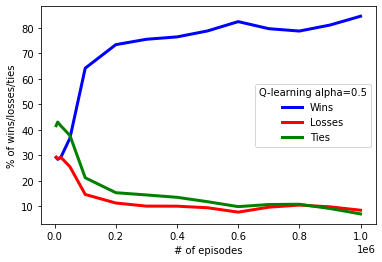

In [8]:
print(win_list)
print(loss_list)
print(tie_list)
print(x_axis)
plt.plot(x_axis,win_list,color='blue',linewidth=3,label='Wins')
plt.plot(x_axis,loss_list,color='red',linewidth=3,label='Losses')
plt.plot(x_axis,tie_list,color='green',linewidth=3,label='Ties')
plt.legend(title='Q-learning alpha=0.5')
plt.xlabel("# of episodes")
plt.ylabel("% of wins/losses/ties")
plt.show()